In [38]:
import pandas as pd
import numpy as np
import os
from scipy import optimize as opt, stats
from matplotlib import pyplot as plt

In [39]:
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn')

In [40]:
path = 'distributions/data'
filenames = os.listdir(path)

In [41]:
df_list = [pd.read_csv(os.path.join(path, filename)) for filename in filenames]

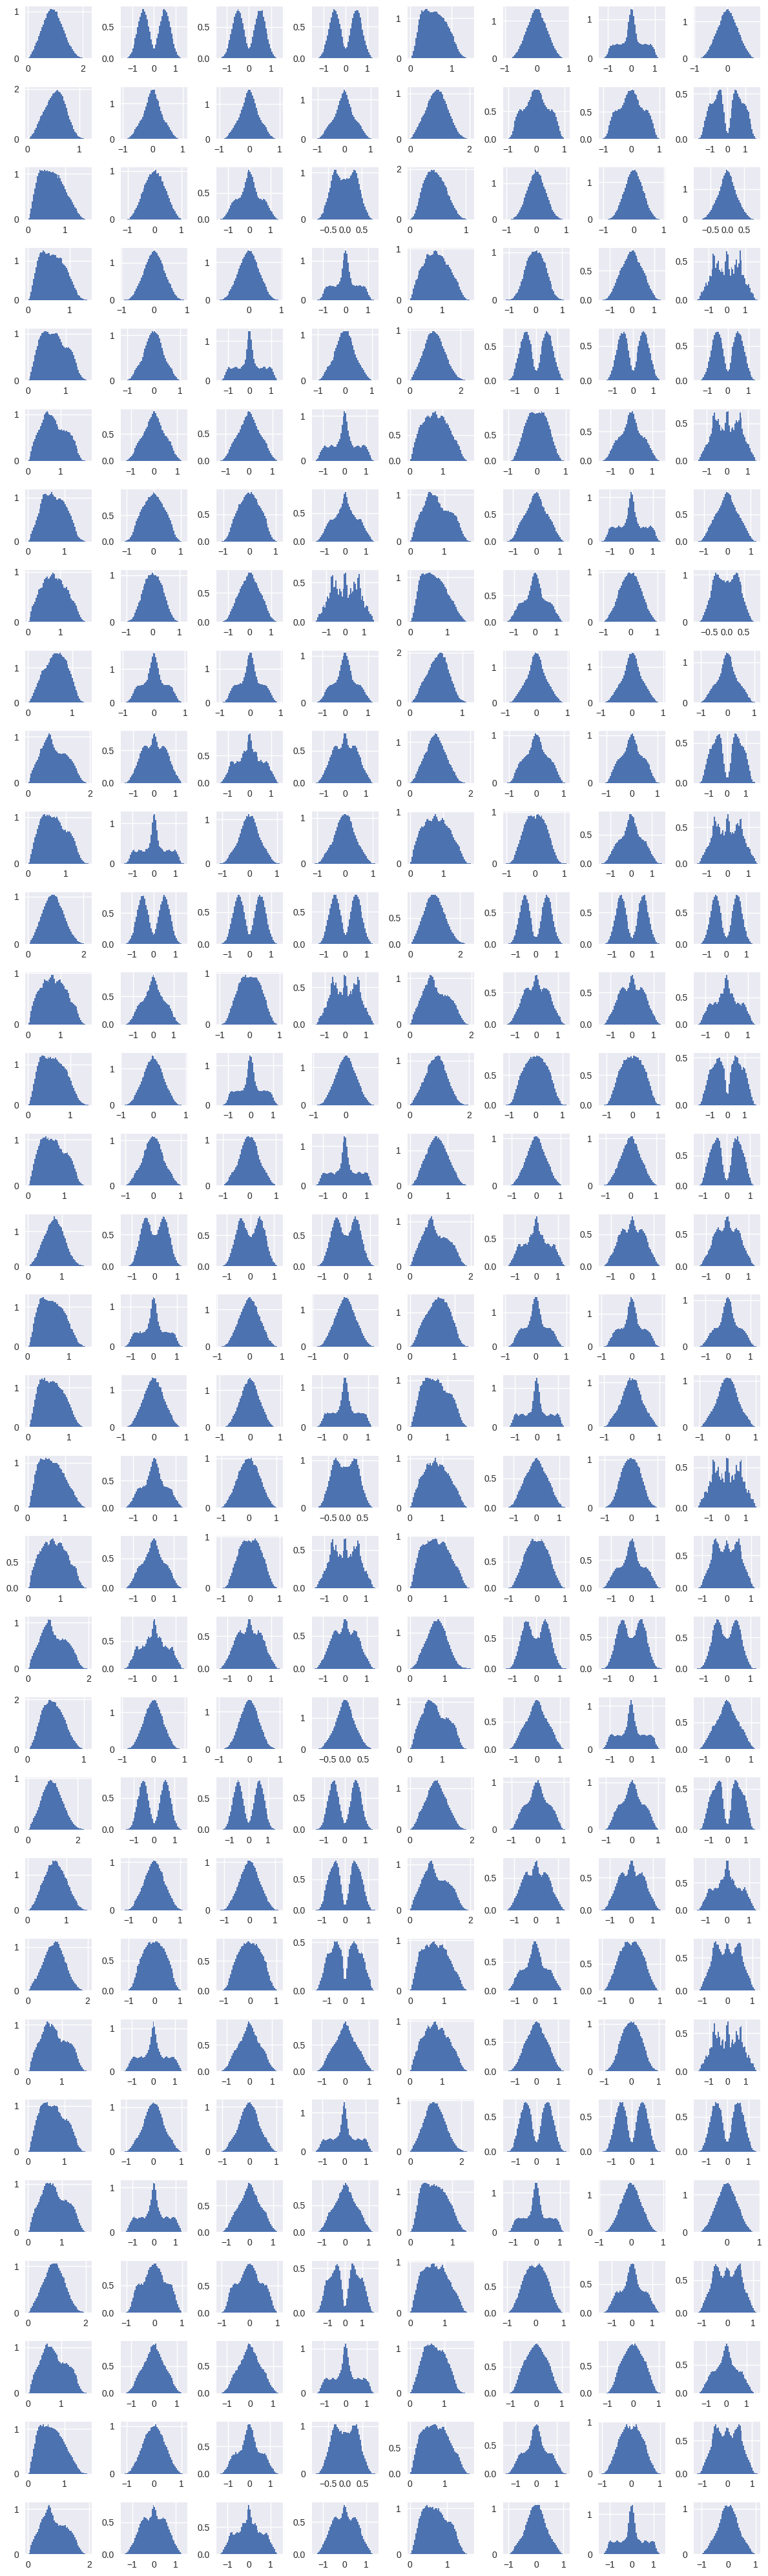

CPU times: user 39.2 s, sys: 186 ms, total: 39.4 s
Wall time: 39.2 s


In [42]:
%%time

bins = 50
fit_data = []

for i, df in enumerate(df_list):
    for j, col in enumerate(df.columns):
        plt.subplot(32, 8, i*4 + (j+1))
        y,x,_ = plt.hist(df[col], bins=bins, density=True)
        x = (x[1:] + x[:-1])/2
        fit_data.append((x,y))
plt.gcf().set_size_inches(12,40)
plt.tight_layout()
plt.show()

In [47]:
def fit(x, y, dist='norm'):
    pdf = stats.norm.pdf if dist == 'norm' else stats.maxwell.pdf
    f = lambda params: pdf(x, loc=params[0], scale=params[1]) - y
    mean, sd = opt.least_squares(f, np.array([0,1]))['x']
    return mean, sd

In [44]:
fits = [fit(x,y) for x,y in fit_data]

In [46]:
df_list[0]

,Magnitude,X,Y,Z
0,1.041149,0.522333,0.651089,0.622288
1,0.801339,-0.441460,-0.588241,-0.318167
2,1.295965,0.663754,0.689440,0.873859
3,0.092710,-0.061876,0.066850,-0.017252
4,0.552327,0.219305,0.475124,0.176713
...,...,...,...,...
99995,0.787422,-0.319177,-0.410904,-0.591031
99996,0.931248,0.728384,0.510521,0.275769
99997,1.089968,-0.226400,-0.869318,-0.617299
99998,0.303720,0.163131,0.144084,0.211835


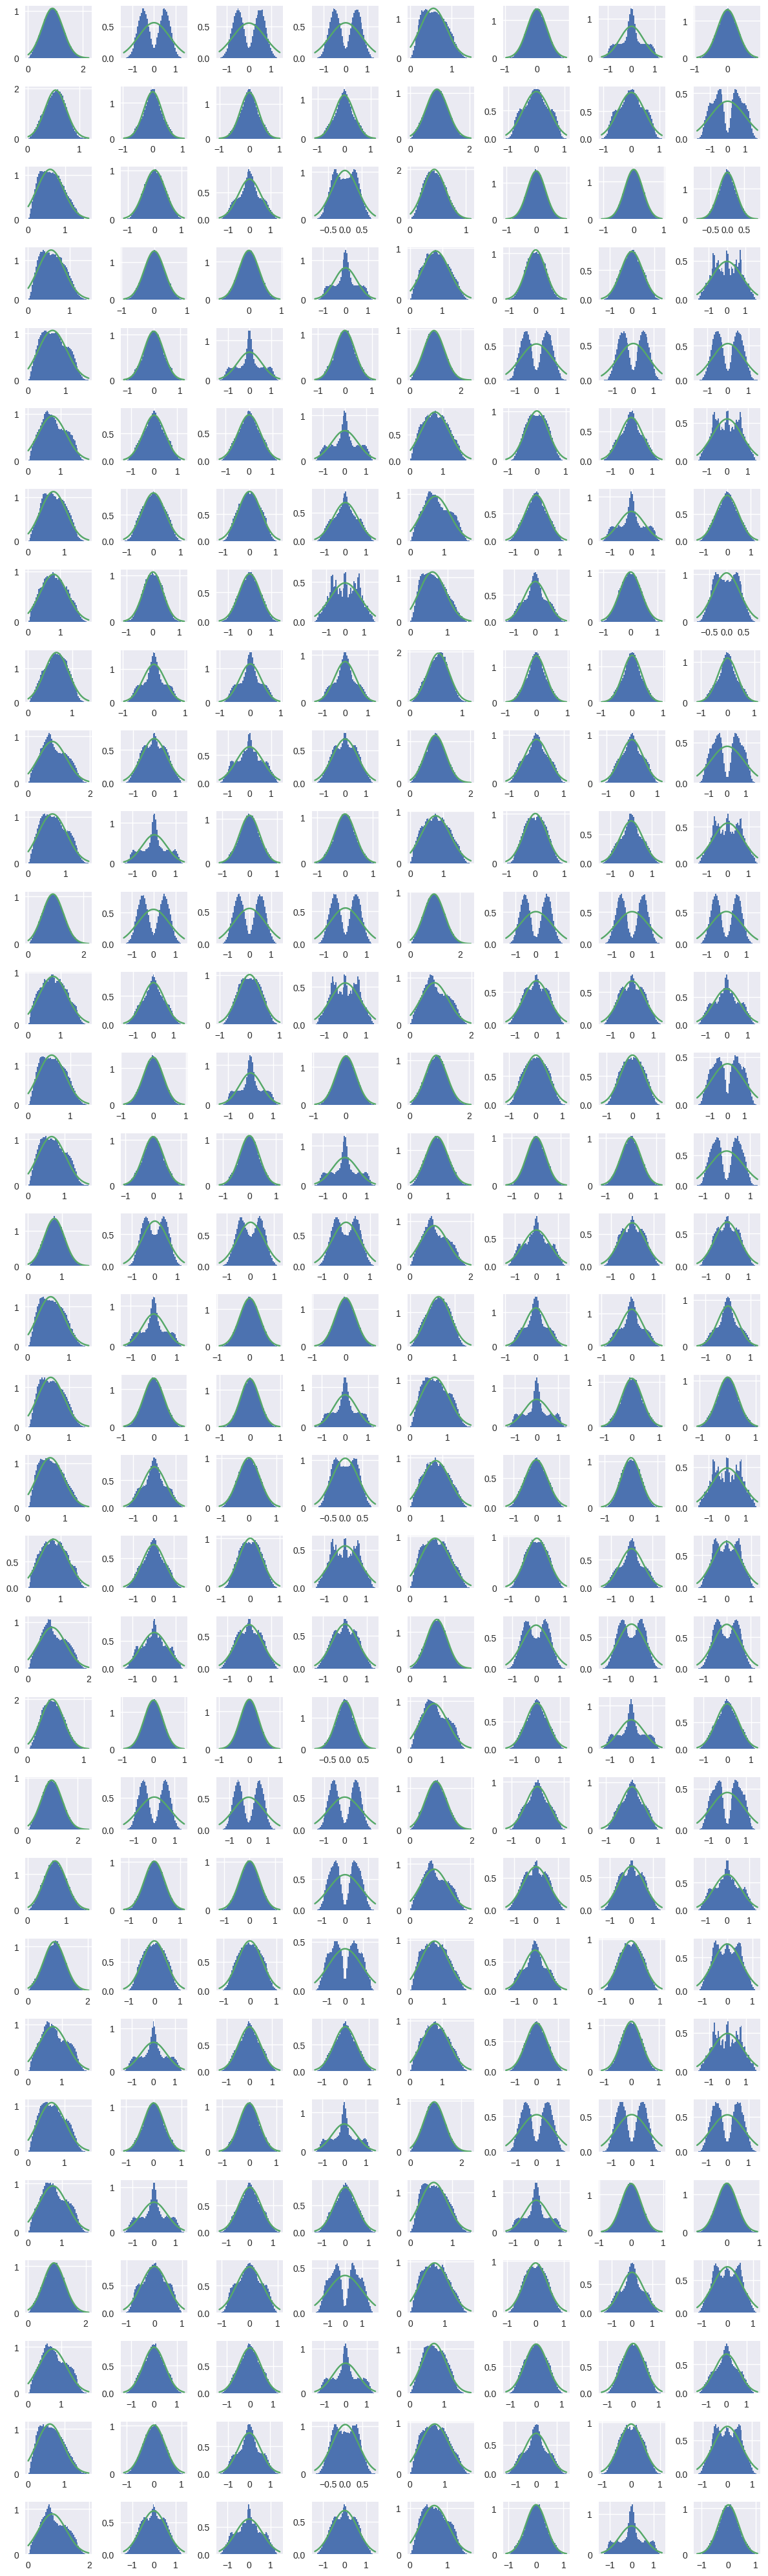

CPU times: user 40.2 s, sys: 251 ms, total: 40.5 s
Wall time: 40.3 s


In [45]:
%%time

bins = 50
i = 0

for df in df_list:
    for col in df.columns:
        if col == 'Magnitude':
            
        plt.subplot(32, 8, i+1)
        plt.hist(df[col], bins=bins, density=True)
        
        domain = np.linspace(df[col].min(), df[col].max(), 1000)
        mean, sd = fits[i]
        plt.plot(domain, stats.norm.pdf(domain, loc=mean, scale=sd))
        
        i += 1
        
plt.gcf().set_size_inches(12,40)
plt.tight_layout()
plt.show()

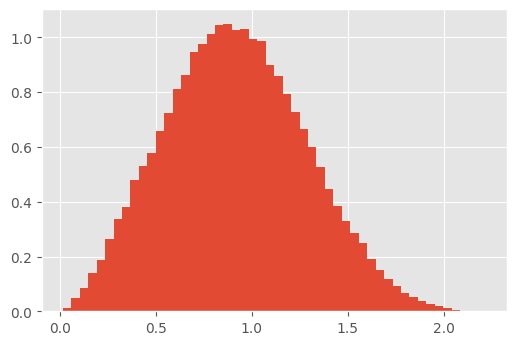

In [11]:
y,x,_ = plt.hist(df_list[0]['Magnitude'], bins=50, density=True)

In [12]:
x = (x[:-1] + x[1:])/2

In [ ]:
f = lambda params: stats.maxwell.pdf(x, loc=params[0], scale=params[1]) - y
mean, sd = opt.least_squares(f, np.array([1,1]))['x']

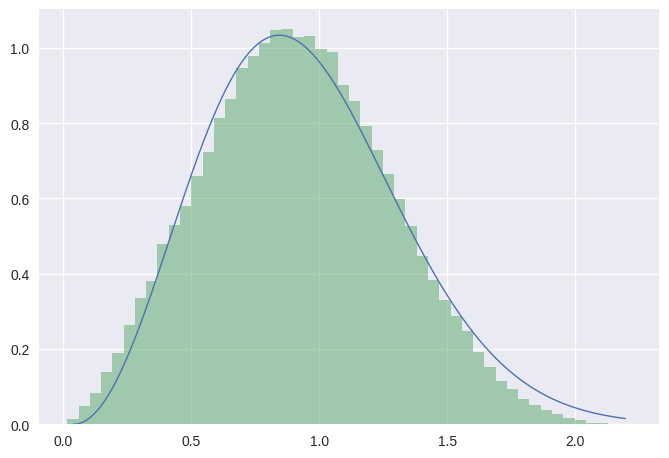

In [22]:
domain = np.linspace(x[0],x[-1],1000)
curve = stats.maxwell.pdf(domain, loc=mean, scale=sd)
plt.plot(domain, curve, lw=1)
plt.hist(df_list[0]['Magnitude'], bins=50, density=True, alpha=0.5)
plt.show()

In [25]:
index = filenames.index('mag_100_basis_(1,1,1)_loc_(1, 1, 1)')
index = 5

In [26]:
fits = []
for col in df_list[index].columns[1:]:
#     y,x,_ = plt.hist(df_list[index][col][::2], bins=50, density=True)
#     x = (x[:-1] + x[1:])/2
#     fits.append(fit(x,y))
    y,x,_ = plt.hist(df_list[index][col], bins=50, density=True)
    x = (x[:-1] + x[1:])/2
    fits.append(fit(x,y))
plt.clf()

<Figure size 800x550 with 0 Axes>

In [27]:
y,x,_ = plt.hist(df_list[index]['Magnitude'], bins=50, density=True)
x = (x[:-1] + x[1:])/2
f = lambda params: stats.maxwell.pdf(x, loc=params[0], scale=params[1]) - y
mean, sd = opt.least_squares(f, np.array([1,1]))['x']
plt.clf()

<Figure size 800x550 with 0 Axes>

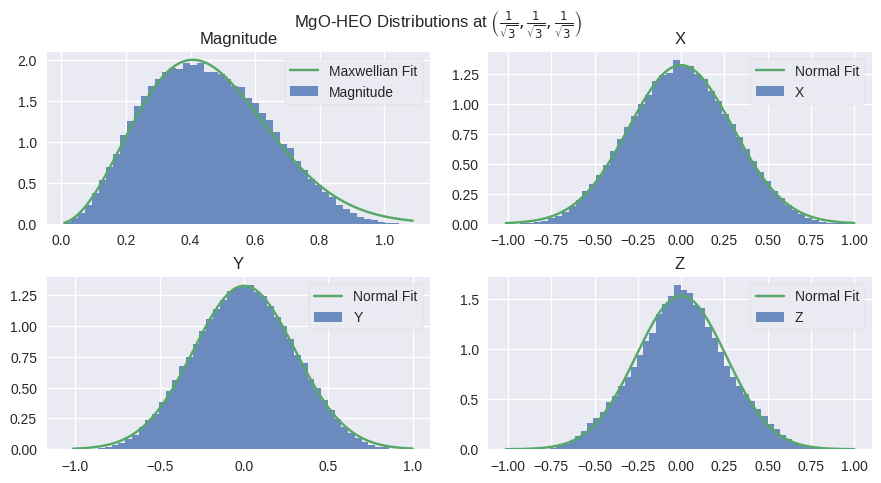

In [28]:
mag_domain = np.linspace(df_list[index]['Magnitude'].min(), df_list[index]['Magnitude'].max(), 1000)
comp_domain = np.linspace(df_list[index]['X'].min(), df_list[index]['X'].max(), 1000)

for i, col in enumerate(df_list[index].columns):
    plt.subplot(2,2,i+1)
    plt.hist(df_list[index][col], bins=50, alpha=0.8, density=True, label=col)
    plt.title(col)
    if i != 0:
        plt.plot(comp_domain, stats.norm.pdf(comp_domain, loc=fits[(i-1)][0], scale=fits[(i-1)][1]), label='Normal Fit')
#         plt.plot(comp_domain, stats.norm.pdf(comp_domain, loc=fits[2*(i-1)+1][0], scale=fits[2*(i-1)+1][1])/2, label='Normal Fit')
    else:
        plt.plot(mag_domain, stats.maxwell.pdf(mag_domain, loc=mean, scale=sd), label='Maxwellian Fit')
        
    plt.legend(frameon=True)

plt.suptitle(r'MgO-HEO Distributions at $\left(\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}},\frac{1}{\sqrt{3}}\right)$')
plt.tight_layout(rect = [0, .03, 1, .96])
plt.gcf().set_size_inches(9,5)
# plt.savefig('distributions/other/new_comp_dist', dpi=200)
plt.show()